<a href="https://colab.research.google.com/github/sathana2458/Sathana-qft-project/blob/main/Copy_of_Sathana_quantum_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cirq numpy matplotlib

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
!pip install cirq
import cirq
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 75.8 MB/s eta 0:00:00


In [ ]:
def generate_signal(n_samples=8, freq=1):
    """
    Generate a simple sinusoidal signal
    """
    x = np.arange(n_samples)
    signal = np.sin(2 * np.pi * freq * x / n_samples)
    return signal

signal = generate_signal()

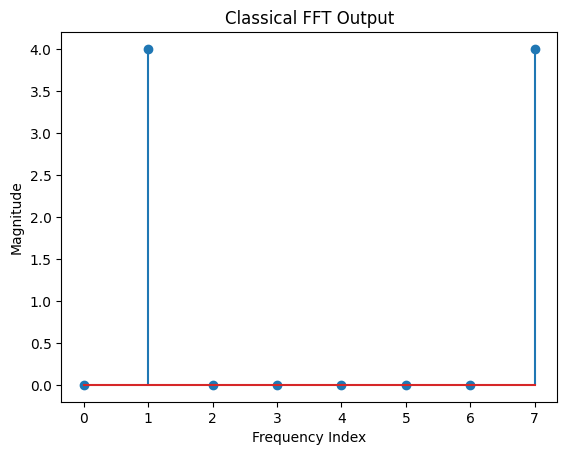

In [ ]:
fft_result = np.abs(fft(signal))

plt.stem(fft_result)
plt.title("Classical FFT Output")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.show()

In [ ]:
def qft(qubits):
    circuit = cirq.Circuit()
    n = len(qubits)

    for i in range(n):
        circuit.append(cirq.H(qubits[i]))
        for j in range(i + 1, n):
            angle = np.pi / (2 ** (j - i))
            circuit.append(cirq.CZ(qubits[j], qubits[i]) ** (angle / np.pi))

    circuit.append(cirq.SWAP(qubits[0], qubits[-1]))
    return circuit

In [ ]:
n_qubits = 3
qubits = cirq.LineQubit.range(n_qubits)

circuit = cirq.Circuit()

# Encode phase (synthetic frequency)
phase = 1 / 4
for q in qubits:
    circuit.append(cirq.H(q))
    circuit.append(cirq.Z(q) ** phase)

# Apply QFT
circuit += qft(qubits)

# Measurement
circuit.append(cirq.measure(*qubits, key='result'))

print("Quantum Circuit:")
print(circuit)

Quantum Circuit:
                          ┌───────┐
0: ───H───T───H───@────────@──────────────────────×───M('result')───
                  │        │                      │   │
1: ───H───T───────@^0.5────┼─────H────@───────────┼───M─────────────
                           │          │           │   │
2: ───H───T────────────────@^0.25─────@^0.5───H───×───M─────────────
                          └───────┘


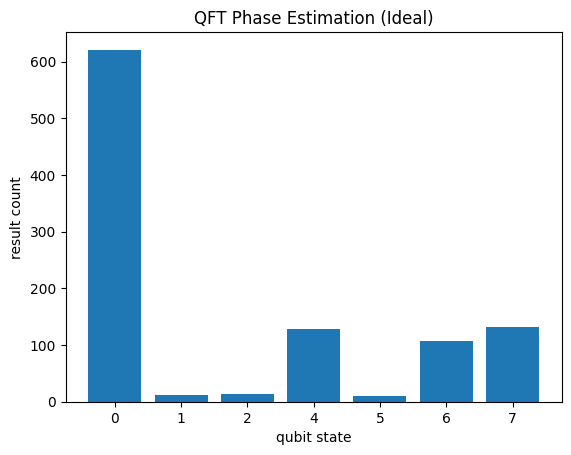

In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1024)

hist = result.histogram(key='result')
cirq.plot_state_histogram(hist)
plt.title("QFT Phase Estimation (Ideal)")
plt.show()

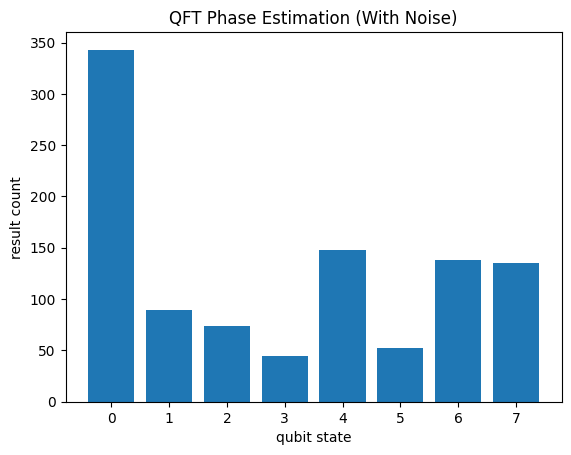

In [ ]:
noise = cirq.depolarize(p=0.05)
noisy_circuit = circuit.with_noise(noise)

noisy_simulator = cirq.DensityMatrixSimulator()
noisy_result = noisy_simulator.run(noisy_circuit, repetitions=1024)

noisy_hist = noisy_result.histogram(key='result')
cirq.plot_state_histogram(noisy_hist)
plt.title("QFT Phase Estimation (With Noise)")
plt.show()

In [ ]:
print("Classical FFT Peaks:", np.argmax(fft_result))
print("Quantum Ideal Peak:", max(hist, key=hist.get))
print("Quantum Noisy Peak:", max(noisy_hist, key=noisy_hist.get))

Classical FFT Peaks: 1
Quantum Ideal Peak: 0
Quantum Noisy Peak: 0
